# Designing a Relational Database
My first project for creating a relational database for my research during my doctorial studies was a very difficult experience. Sometime after the successful completeion of my studies, I was faced with a task to design and create an RDB for a client. Going through my notes and reading around to find a simplar approach to perform the task, I chance on a tutoria by [Craig Dickson](https://towardsdatascience.com/designing-a-relational-database-and-creating-an-entity-relationship-diagram-89c1c19320b2), one of my favoriate data science gurus. Combining my notes with that of Craig's tutorial was a game changer for me. I present the amalgamated approach using Craig's data. I will also present a Part II later using data pulled from Kaggle to complete the series. But first let's get some basics of RDB.

### Relational Database Management System
We consider a RDB as a type of database that stores and provides access to data points that are related to one another. So we can create and manage (read, update and delete the information in the RDB) using a Relational Database Management System (RDBMS). 

### The RDBMSs Used
We use Microsoft SQl Server (and MySQL) because it is open source, hence free, although the manay other examples like Oracle, and PostgreSQL can be applied. Each of these are different so the SQL code written for one cannot be used for the other without making some modifications.

Within the RDB, would be records of various formats, some of which are stored in tables (eg. Excel spreadsheets) where each column is an attribute (e.g customer name, product name, purchase cost, retail price) and each row represents a record (a particular item or instance which has those attributes).

#### RDB as Relational
The RDB is relational because there can be one or more relations between the data stored in the tables (*entities*). As a result these tables can be connected using specific (*primary and forign*) keys.

#### Primary Key, Foreign Keys, and Entity Relationships
Each record would have an attribute called the *Primary Key* like the `customer_ID` or `product_ID`, or combination of attributes called *composite key*, which uniquely identifies it. The unique identifier to use depends on the nature of the data and cannot be NULL.

We also have a `foreign key`, which store the relationship between two entities/variables, and can be estabished by mapping the *primary key* from one record in the database to a key in an entity in the same or another database. 

It is possible that each `customer_id` (*primary key*) may have multiple products associated with it. Where this is the case, we have a `1-to-N relationship` (1 customer having any number of relationship) between these entities. It is also likely that each product is associated with one and only one customer. 

The attribute of the relationship (i.e. number of entities an entity can have a relationship) is known as the `cardinality of the relationship`. We could therefore have a `1-to-N` or `N-to-M` (i.e. many to many). So if we attempt to store the key for a product on a customer table in the database, we store the foreign key on the table which is on the N side of a 1-to-N relationship.

#### Fundamentals to Consider when Creating RDB

- Each table must have a primary key which uniquely identifies each record in the table, 

- the primary key cannot be null.

- For each relationship in the RDB (`1-to-N relationship`) requires a foreign key to define that relationship.

### Designing the Database
Designing a databse involves the following steps.

#### 1. Defining the Requirements
We consider what the database is wanted for since different requirements means different information structures, relationships, designs and implementations. Hence there is no one best implementation to solve a particular problem. However, there can be better solutions to solve different problems arising from the implimentation. Hence as we walk through with the design, we consider several questions.

##### So what is our use case? 
We are going to create a relatively simple database for a language school based in Berlin, Germany. So we write down our requirements, or for the client/client's department database, get the requirements in written form from the end users of the database.

##### What information do they want to store? 
What types of entities do we need to create tables for (customers, orders, products, courses, website-clicks, data downloads, etc)? 

As with anything to do with taking advantage of data, to make our work most effective we need to think about what the use cases are and what our users are looking for.

Here are the requirements for our example database:

    1. The International Language School is a language training school.

    2. It offers language classes for corporate clients. 
    
    - The language classes can be conducted at the School, at the offices of the client, or any location the client may prefer. 
    
    3. The School employs teachers. 
    
    - A teacher may teach a single course or multiple courses.

    4. The school has clients (corporate clients). 
    
    - Each client may offer multiple courses via the school. 
    
    5. Clients offer courses to their employees, 
    
    - The employees have an option to participate or not.

    6. The courses are offered to the participants by the clients. 
    
    - Each course has one teacher at any given time.

    7. Participants in the courses are employees of the client companies (i.e. they work for the client companies). 
    
    - Each participant can be employed by one company at a time. 
    
    - The participants may be enrolled in more than one course.

The list of the requirements could be longer and more complex than this, but this one will give us the information we need to start building the database.

#### 2. Soft Skill Requirements
The ability to facilitate clear communication between technical and less-technical employees. This is important bcause we do not want to spend a lot of time designing, coding and implementing a database only to find that it is not fit for the intended use by the client. So we ask questions to clarify the requirements and avoid assumptions. This is because what is obvious to us may not be obvious to others or non-peers. As a result, planning is important.

#### 3. Make a Plan Based on the Requirements
We read through the requirements document carefully, making note of the items which might become entities in the database, and the possible relationships between them.

#### 4. Identifying Entities
As we go through the requirements, we identify potential entities such as clients, teachers, courses, participants, and location. So we list candidate for entities as:

- clients

- teachers

- courses

- participants

- location

As we continue to probe the list, we also found various pieces of information about the relationships between these entities. These includes:

1. teacher *teaches* courses (`1-to-N relationship`)

2. courses are *offered* by client (`1-to-N relationship`)

3. participants *works* for the client (`1-to-N relationship`)

4. particiants *takes* courses (`N-to-M relationship`)

5. courses are *delivered* at various locations (`1-to-N relationship`)

6. participants *study* at a location (`N-to-M relationship`)

We also found some information about participants taking multiple language courses. The courses can be taken on the school site, a client office, or another location. Some clients may have multiple offices, or a large facility with multiple locations for different courses. These are all important and we would have to handle handle in our databases using an RDBMS. However, as a starting point of the process we assume each client to have one location for their classes.                

#### 5. Creating an Entity Relationship Diagram
Using [Lucidchart](https://www.lucidchart.com/pages/), we create an entity relation diagram (ERD) to map the relationships between the entities in the database . This is to ensure that we have everything planned out before we start building the database itself. It can help to straighten out the relationships and identify important insights or redundant attributes as we proceed. 

We create a schematic ERD for the relationships between the entities. We notice that with the exception of participant, all of the entities are connected to one entity (i.e. `1-to-N Relationships`). Participant is connected to more than one entity, ence we have an `N-to-M relationship`.
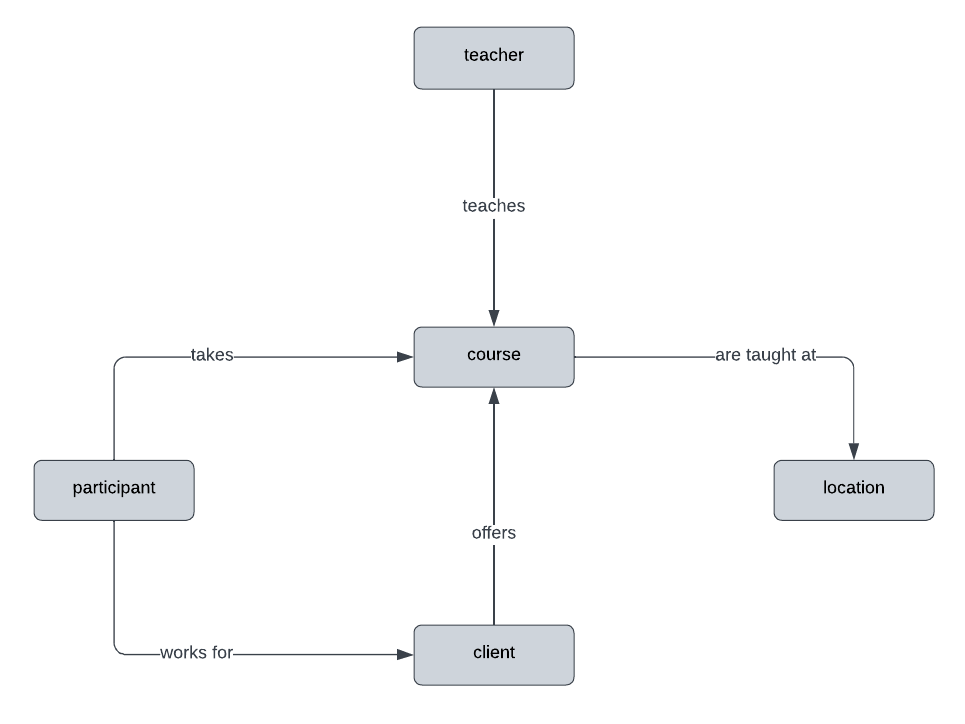

                                    A schematic ERD for the database

#### 6. Considering Attributes to Store
We consider the attributes to store for each of the entities, some of which may have already been provided in the requirements document. We may also may use our discretion as the database developer. Once the attributes are decided, we create an ERD for each entity.

##### ERD Course
We begin with the course entity since that is central to our ERD. The course would have an ID (`course_id`) as an arbitrary primary key because of its location in our schematic diagram. It would have a some important information such as the course's name `language`, offered by a `client`, taught by a `teacher`. The course has various `levels`. It is taught at a `location` (in the school, at a clients office, or at another location of choice of the client. It would have a `start date`, `end date`, and course `duration` in weeks. 

We would use the fields for `teacher` and `client` to connect with the entities for teacher and client in our RDB so that the three entities can connect with each other. Thus, the fields `teacher` and `client` for this entity are `foreign keys` for the teacher course and client course relationships.
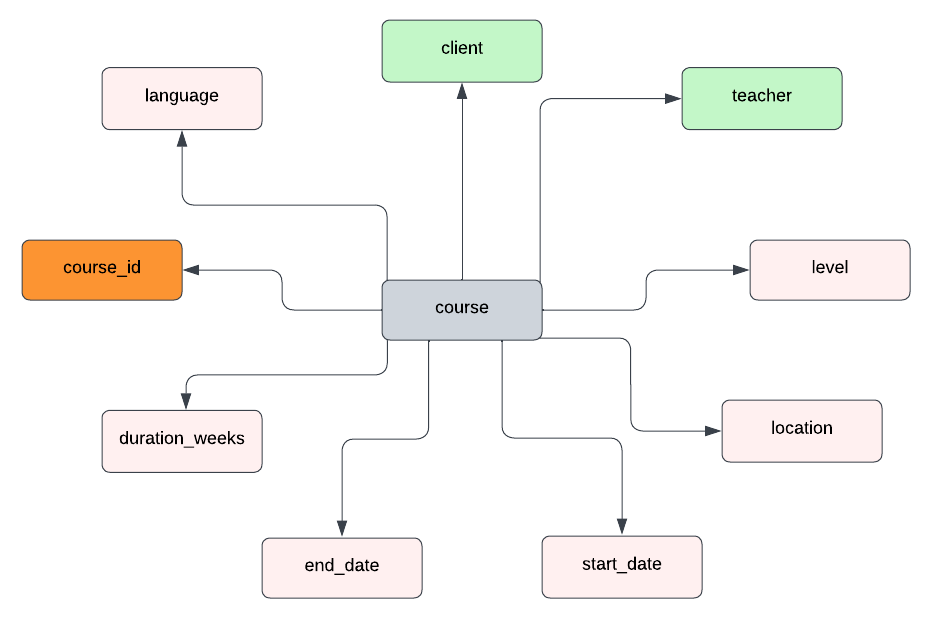
                                            
                                            A detail ERD for entity course

##### ERD Client
We begin with the client entity. Here we consider attributes like `client_id` (as the `primary_key`), the name of the `client`, the `address`, `phone number`, and the courses being offered `language` (which is the foreign key) to the paticipants. 
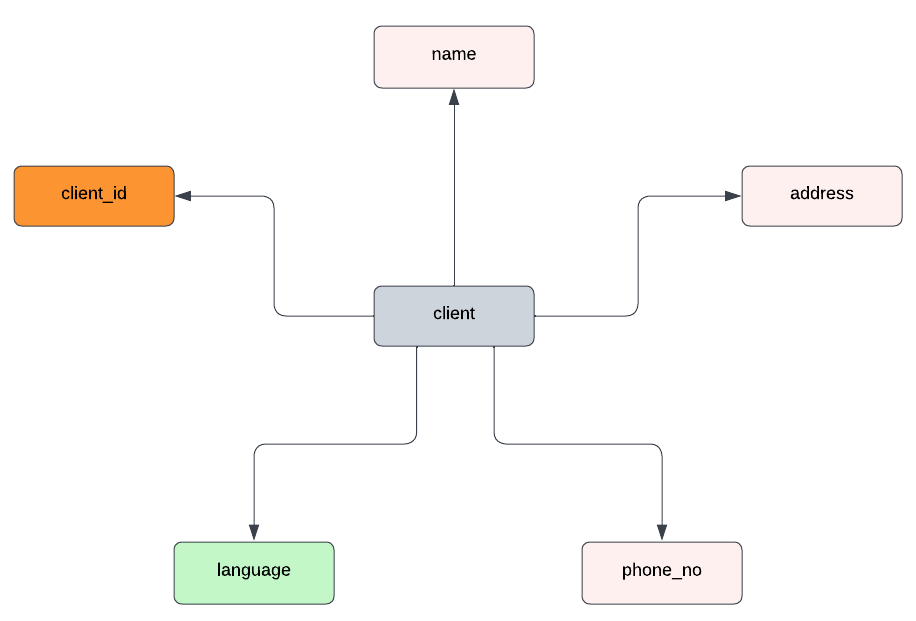

                                           A detail ERD for entity client

##### ERD Teacher
Next is the teacher entity. Here we consider (a) the teacher must be identified (`teacher_id`) with a first name (`first_name`) and last name (`last_name`), teacher date of birth (`dob`), `address`, `phone number`, maybe tax identification (`tax_id`) because he pays taxes, the `language` courses taught by the teacher.
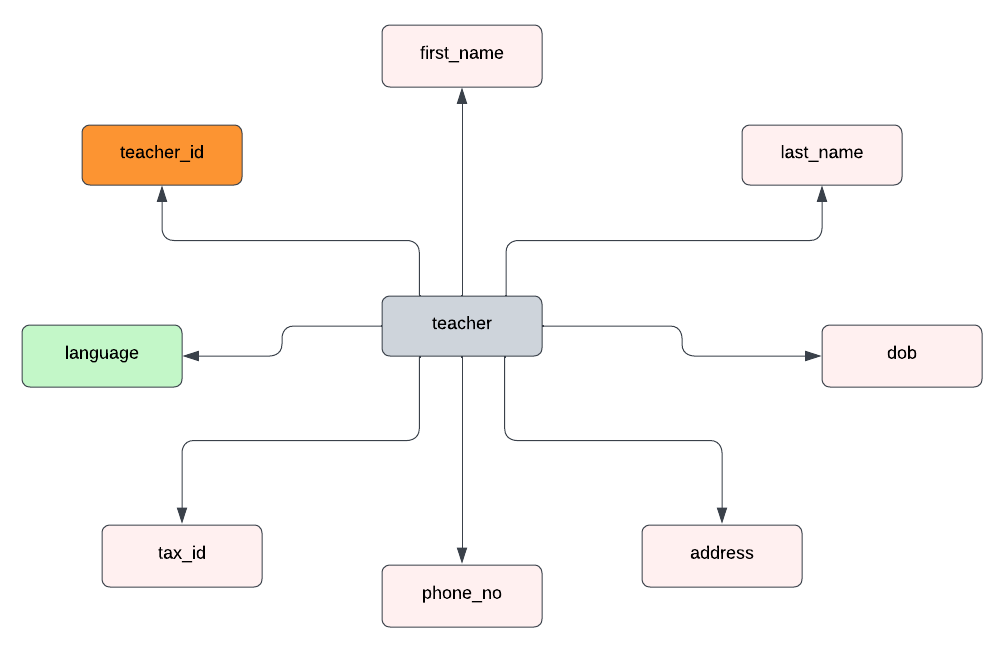

                                            A detail ERD for the entity teacher

##### ERD Participants
We move to entity candidate participants table. Each participant must be identified so we set a `participant_id` as a primary key. The participant would have a `first_name`, a `last_name`, `date of birth` a contact `address` and `phone` number and the `language` being studied. We are informed that the participants are employed by corporate clients so we would like to store the `client` name. We intend to use the language field as a `foreign key` to store the relationship between clients and participants.
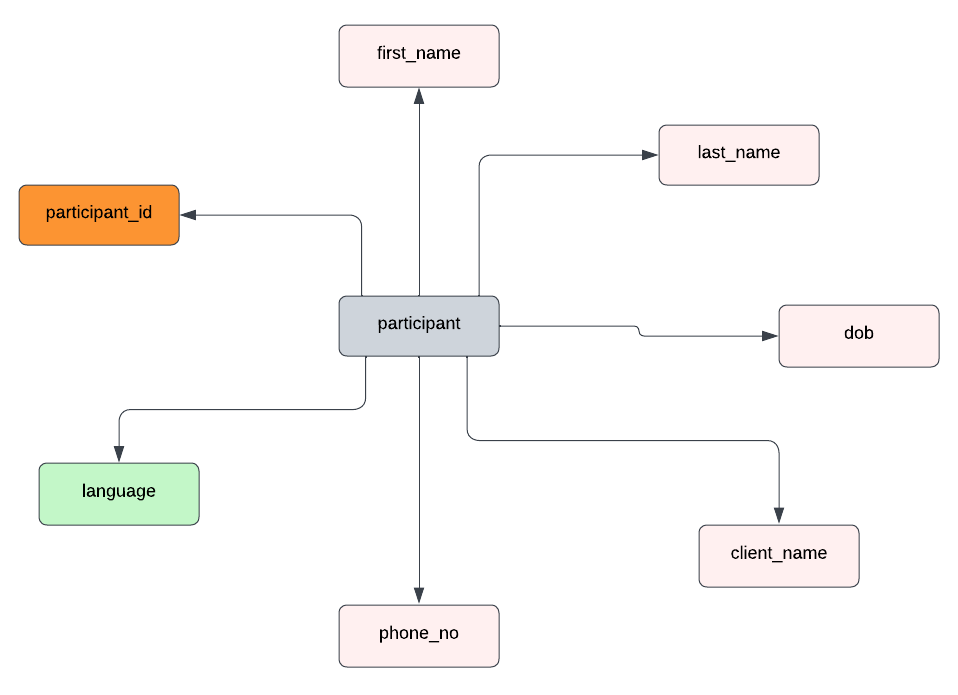

                                           A detail ERD for the entity participant

##### ERD Location
We move to the final entity candidate location. Each location where the causes are taught must be identified so we set a `location_id` as a primary key. We expect every location to have a an `address`, a postal code (`zipcode`), and a contact `phone number` to an office. The `language` taught at these locations must be identified which we intend to use as a `foreign key` to store the relationship between location and courses.
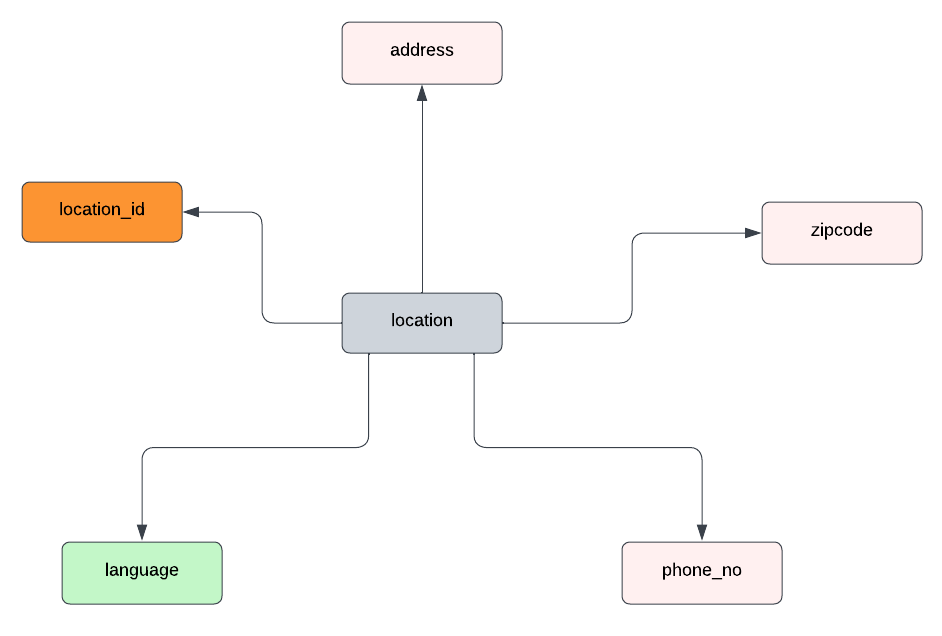

                                           A detail ERD for the entity Location

##### Mapping the Relationships
We map the relationships base on the requirements as follows:

1. a teacher *teaches* courses (`1-to-N relationship`), bearing in mind the clarification that each course may have only one teacher at a time even though a teacher may teach multiple courses. 

So we connect these in the ERD through a relationship with the teacher field as a `foreign key`. This field refers to the `teacher_id` attribute in the teacher entity. Here, we use double lines to connect the two entities `teacher` and `course` through the `teacher_id` to indicate total participation (i.e. every entity in the table must participate) level of the entity in the relationship. This way, we are suggesting that every course must have a teacher. A partial participation (i.e. single lines), means there may exist some teachers who are not yet or not currently teaching any courses. 

2. courses are *offered* by client (`1-to-N relationship`). 

So we model the relationship between client and course, with the probability of each client offering multiple courses provided by the school. However, each course may be associated with a maximum of 1 client. We also expect total participation between the entities so we use double lines since the school only offers classes on behalf of client companies. Hence, every course is associated with one client, and every client must be associated with at least one course.

3. participants *works* for the client (`1-to-N relationship`), and

So we model the relationship between participants and the new ERD using the `client` field (foreign key) bearing in mind that clients may employ multiple participants, participants may only work for one client, and as each participant can work for one only client at a time.

4. particiants *takes* courses (`N-to-M relationship`).

So we model the relationship between participants and the new ERD using the `course` field (foreign key) bearing in mind that participants can take multiple courses, each participant may take only one course at a time. However, the participants also have a relationship with client.

If we put all of this together, plus just a little more work (which we’ll go through in a moment), we can create our final, complete, Entity Relationship Diagram:

5. courses are *delivered* at various locations (`1-to-N relationship`)

So we model the relationship between location and the new ERD using the `course` field (foreign key) bearing in mind that the courses can be delivered at multiple locations, and a course being attended by a participant can be delivered at only one location at a time.

6. participants *study* at a location (`N-to-M relationship`)

So we model the relationship between the new ERD and participants using the `location` field (foreign key) bearing in mind that participants can take a course at multiple locations, each participant may take a course at one location at a time a time. However, one client may have multiple office location for the participant to take the course. This help create a complete ERD.

### Applied Technologies
- [Lucidchart](https://www.lucidchart.com/pages/) to make the diagrams.

**George Jordan***, Sunday February 7, 2021.